In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
data = pd.read_csv('C:\\Users\\UTSAV\\Desktop\\github\\LinearRegression\\\\auto.csv',names = cols)
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
for i in range(len(data.horsepower)):
    if(data.horsepower[i] == '?'):
        data.horsepower[i] = 92

C:\Users\UTSAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
x = data.drop(['horsepower','car_name','weight'], axis = 1)
y = data['weight']

In [6]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
X = sm.add_constant(x)
var = sm.OLS(y, X)
var1 = var.fit()
print(var1.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     698.7
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          1.68e-205
Time:                        14:42:23   Log-Likelihood:                -2757.5
No. Observations:                 398   AIC:                             5529.
Df Residuals:                     391   BIC:                             5557.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -679.8196    316.318     -2.149   

C:\Users\UTSAV\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = model.predict(x_test)
y_pred

array([4106.6963634 , 2510.24169751, 3938.88634954, 2619.29284211,
       3230.47789961, 1733.75958309, 2023.33496697, 2730.02010395,
       4188.85833492, 2861.24898105, 1807.27493001, 1981.47920199,
       3451.6817027 , 2541.43590266, 4027.85843307, 1893.65936762,
       2498.9226633 , 2809.57051954, 3322.79130522, 1855.31721411,
       4504.65172621, 2677.09901372, 2561.92036726, 2555.71543461,
       2004.23800255, 2871.02890521, 1844.65584262, 2285.09628268,
       2365.92844423, 3670.50728804, 3515.55294022, 2151.4388184 ,
       3802.5450971 , 2032.66456485, 3399.83869934, 2528.97078565,
       3381.66843594, 4293.23178426, 2025.40372872, 4668.48137265,
       4559.74969997, 3938.56527351, 2386.90216703, 2251.19986194,
       2533.54432297, 2338.20250175, 3301.96700333, 4103.88146593,
       2625.22462016, 2077.29559081, 1771.62253831, 2121.77642973,
       3987.99341899, 1843.04343829, 4097.05291818, 3983.28943085,
       3324.8661536 , 3332.10420769, 2170.76809759, 3512.03594

In [10]:
model.score(x_test,y_test)

0.9200054914892264

In [11]:
data['horsepower'].head(50)

0     130
1     165
2     150
3     150
4     140
5     198
6     220
7     215
8     225
9     190
10    170
11    160
12    150
13    225
14     95
15     95
16     97
17     85
18     88
19     46
20     87
21     90
22     95
23    113
24     90
25    215
26    200
27    210
28    193
29     88
30     90
31     95
32     92
33    100
34    105
35    100
36     88
37    100
38    165
39    175
40    153
41    150
42    180
43    170
44    175
45    110
46     72
47    100
48     88
49     86
Name: horsepower, dtype: object

In [12]:
x.head(10)

,mpg,cylinders,displacement,acceleration,model_year,origin
0,18.0,8,307.0,12.0,70,1
1,15.0,8,350.0,11.5,70,1
2,18.0,8,318.0,11.0,70,1
3,16.0,8,304.0,12.0,70,1
4,17.0,8,302.0,10.5,70,1
5,15.0,8,429.0,10.0,70,1
6,14.0,8,454.0,9.0,70,1
7,14.0,8,440.0,8.5,70,1
8,14.0,8,455.0,10.0,70,1
9,15.0,8,390.0,8.5,70,1


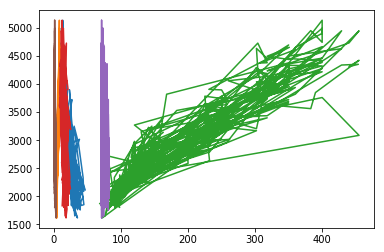

In [13]:
plt.plot(x,y)